### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-05,440752,4568478,648468,583628,263140,133553,129515,183896,115401,92360,84795,125278,110674,4848,198488
2021-09-06,441042,4576405,648998,583810,263470,133598,129567,184672,115563,92419,84928,125331,111257,4848,198523
2021-09-07,441411,4586278,650511,584108,264541,133808,129638,185447,115680,92463,85066,125378,111892,4848,198568
2021-09-08,441749,4596394,652657,584421,265420,133999,129707,186224,115846,92463,85147,125427,112430,4848,198595
2021-09-09,442009,4605721,654583,585174,266150,134166,129766,186999,115941,92559,85218,125480,112935,4848,198621


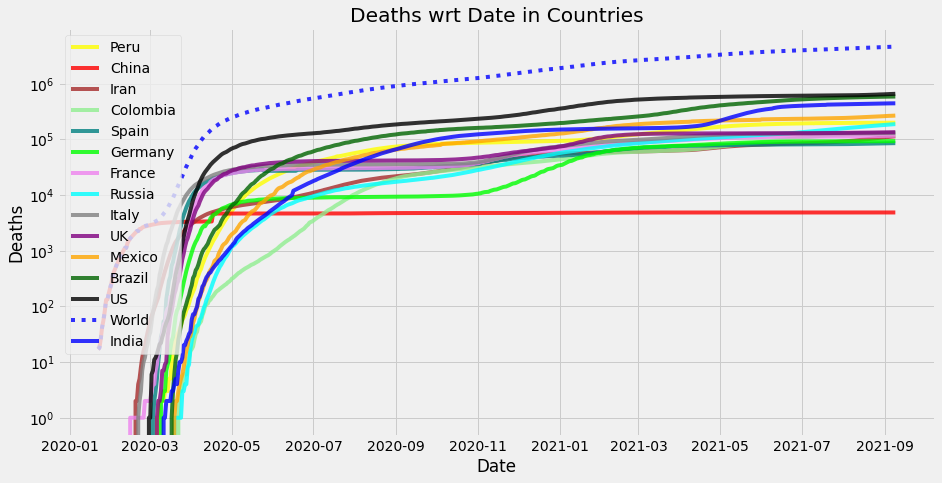

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-05,38948,426688,38561,12915,7504,36545,5314,18262,10410,-1050,0,1669,25870,26,902
2021-09-06,31222,435867,73326,9154,5127,40976,3347,17487,3050,6779,9357,1124,27579,38,474
2021-09-07,37875,721592,261683,14304,15784,37535,4715,17060,14541,19080,5528,1637,27138,25,943
2021-09-08,43263,626911,176710,13771,15876,38579,5921,17673,5931,5110,5618,1787,26854,30,1085
2021-09-09,34973,620688,145081,30891,14828,37570,5518,18033,18120,23718,4763,1803,26821,19,957


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-05,39926,619652,137800,26324,15054,33407,6003,19531,17618,7698,9496,3781,31816,42,1124
2021-09-06,39345,607399,133501,25179,14392,33912,5826,19395,16647,7637,9487,3603,31533,41,1081
2021-09-07,39247,615012,142047,24454,14485,34153,5752,19239,16506,8400,9223,3472,31240,40,1072
2021-09-08,39515,615805,144358,23742,14577,34448,5763,19135,15801,8180,8983,3360,30948,40,1073
2021-09-09,39212,616131,144406,24219,14594,34656,5747,19061,15956,9216,8701,3256,30673,38,1065


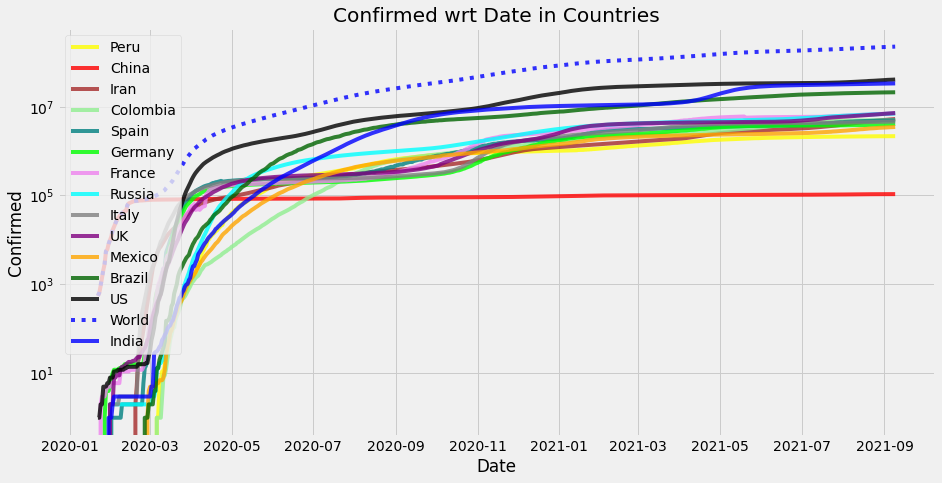

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-05,219,6473,362,266,272,68,49,779,49,8,0,48,610,0,41
2021-09-06,290,7927,530,182,330,45,52,776,162,59,133,53,583,0,35
2021-09-07,369,9873,1513,298,1071,210,71,775,117,44,138,47,635,0,45
2021-09-08,338,10116,2146,313,879,191,69,777,166,0,81,49,538,0,27
2021-09-09,260,9327,1926,753,730,167,59,775,95,96,71,53,505,0,26


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-05,397.02,9450.73,1316.28,648.92,673.59,110.23,52.96,777.27,103.35,23.40,94.72,81.06,593.58,-0.0,47.57
2021-09-06,383.64,9260.26,1217.99,590.55,630.64,102.07,52.84,777.11,110.68,27.85,99.51,77.56,592.26,-0.0,46.00
2021-09-07,381.81,9336.85,1254.87,553.99,685.69,115.57,55.11,776.84,111.47,29.87,104.32,73.74,597.60,-0.0,45.88
2021-09-08,376.33,9434.25,1366.26,523.86,709.85,124.99,56.85,776.86,118.29,26.14,101.41,70.64,590.15,-0.0,43.52
2021-09-09,361.79,9420.84,1436.23,552.50,712.37,130.25,57.12,776.63,115.38,34.87,97.60,68.44,579.51,-0.0,41.33


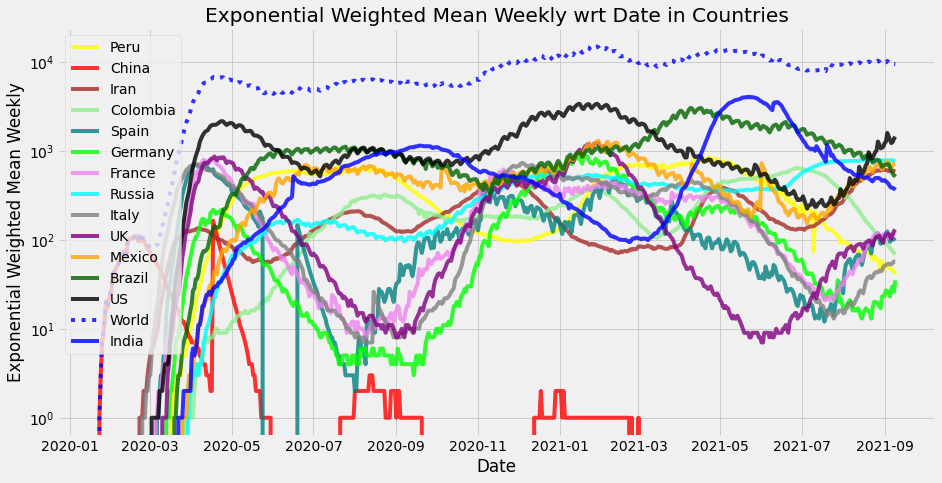

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

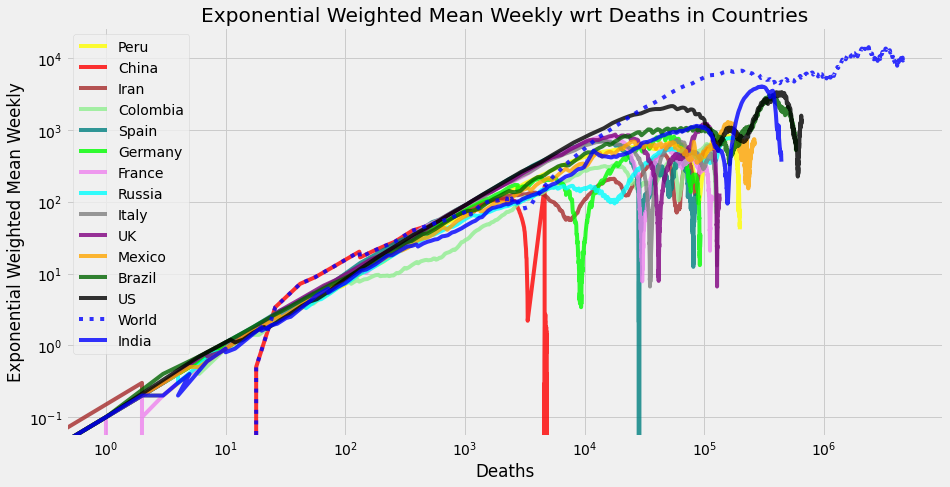

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

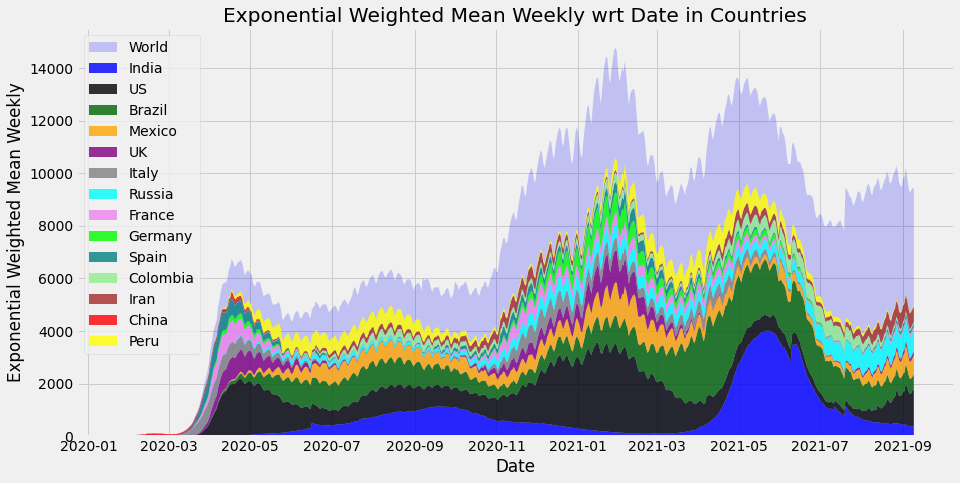

In [20]:
stackplotter(AVG, name)

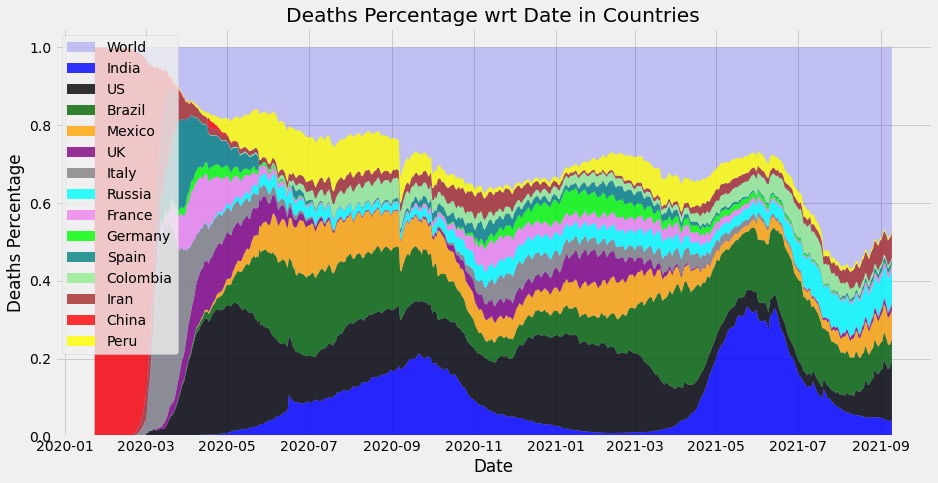

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

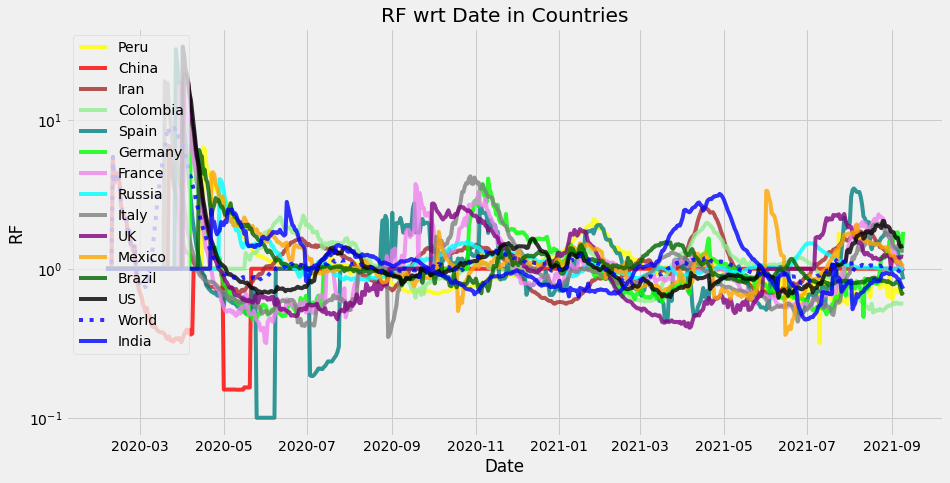

In [23]:
plotter(Reproductivity, 'RF')

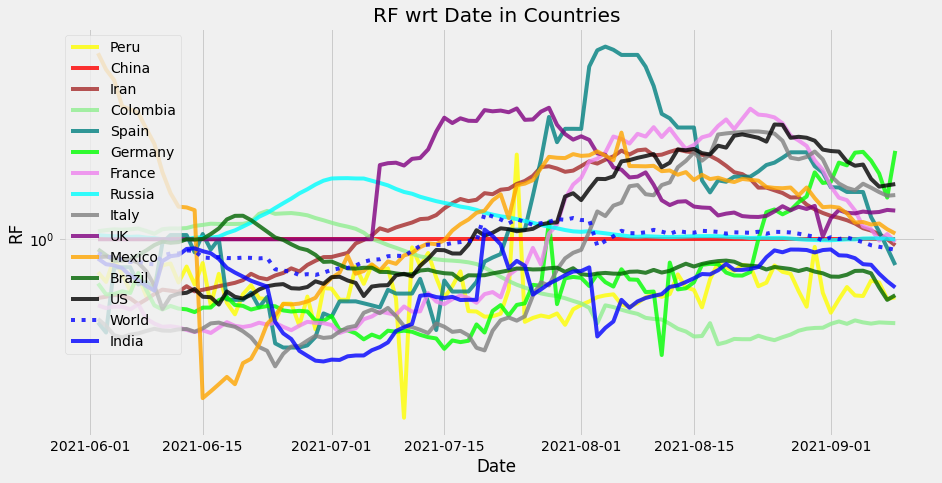

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

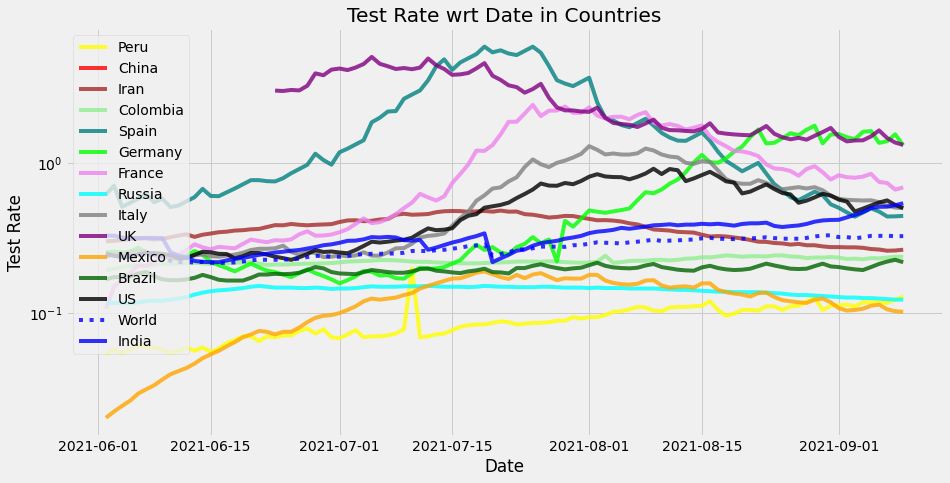

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

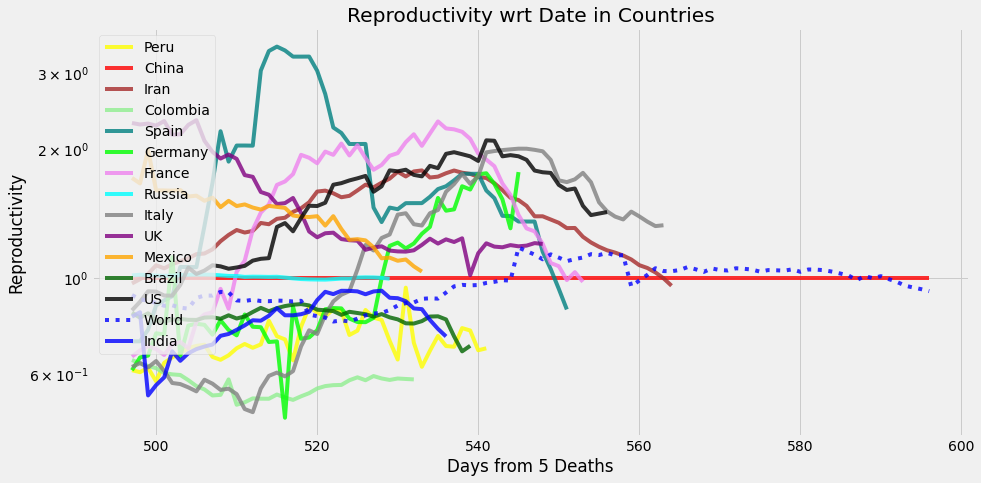

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

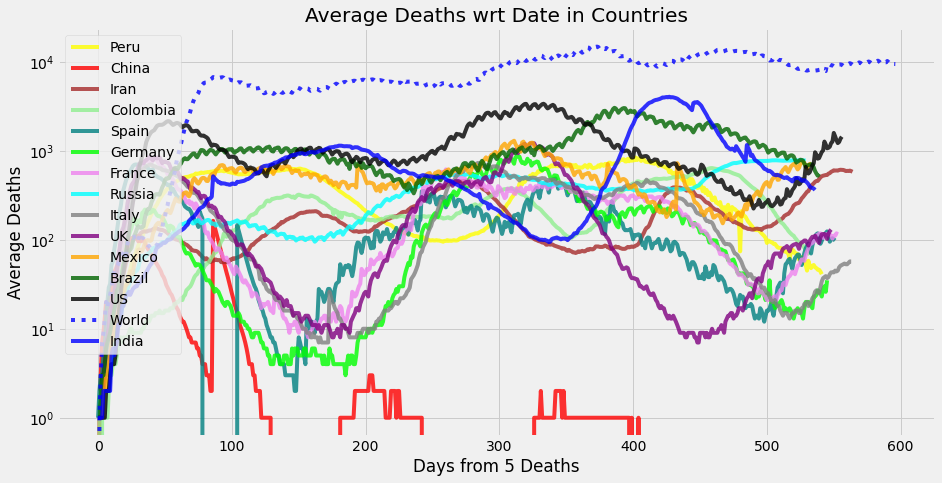

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

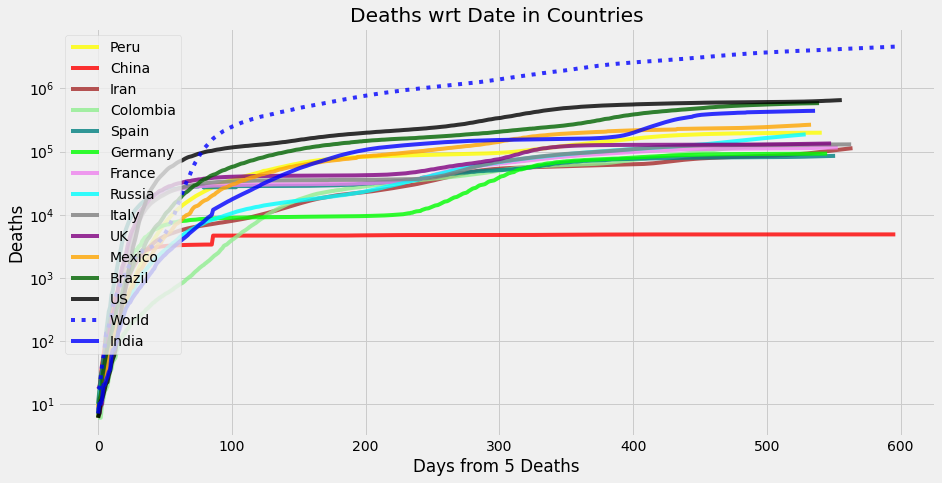

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4605721,9327,9142.00,9420.84,0.9343,223180491,0.327,616131,921.14
US,654583,1926,1547.57,1436.23,1.4265,40601792,0.503,144406,130.92
Brazil,585174,753,465.71,552.50,0.6977,20958899,0.219,24219,117.03
India,442009,260,302.00,361.79,0.7335,33174954,0.542,39212,88.40
Mexico,266150,730,664.86,712.37,1.0377,3479999,0.102,14594,53.23
Peru,198621,26,36.71,41.33,0.6884,2158493,0.129,1065,39.72
Russia,186999,775,777.00,776.63,0.9990,6982628,0.123,19061,37.40
Indonesia,138116,334,634.29,654.09,0.5512,4153355,0.106,13821,27.62
UK,134166,167,131.71,130.25,1.2029,7165200,1.330,34656,26.83


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4605721,9327,9142.00,9420.84,0.9343,223180491,0.327,616131,921.14
US,654583,1926,1547.57,1436.23,1.4265,40601792,0.503,144406,130.92
Russia,186999,775,777.00,776.63,0.9990,6982628,0.123,19061,37.40
Mexico,266150,730,664.86,712.37,1.0377,3479999,0.102,14594,53.23
Indonesia,138116,334,634.29,654.09,0.5512,4153355,0.106,13821,27.62
Iran,112935,505,563.86,579.51,0.9619,5237799,0.265,30673,22.59
Brazil,585174,753,465.71,552.50,0.6977,20958899,0.219,24219,117.03
Vietnam,14470,335,333.14,343.54,1.0114,576096,0.168,11538,2.89
Malaysia,19486,323,327.86,303.78,1.2148,1919774,0.323,19644,3.90


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4605721


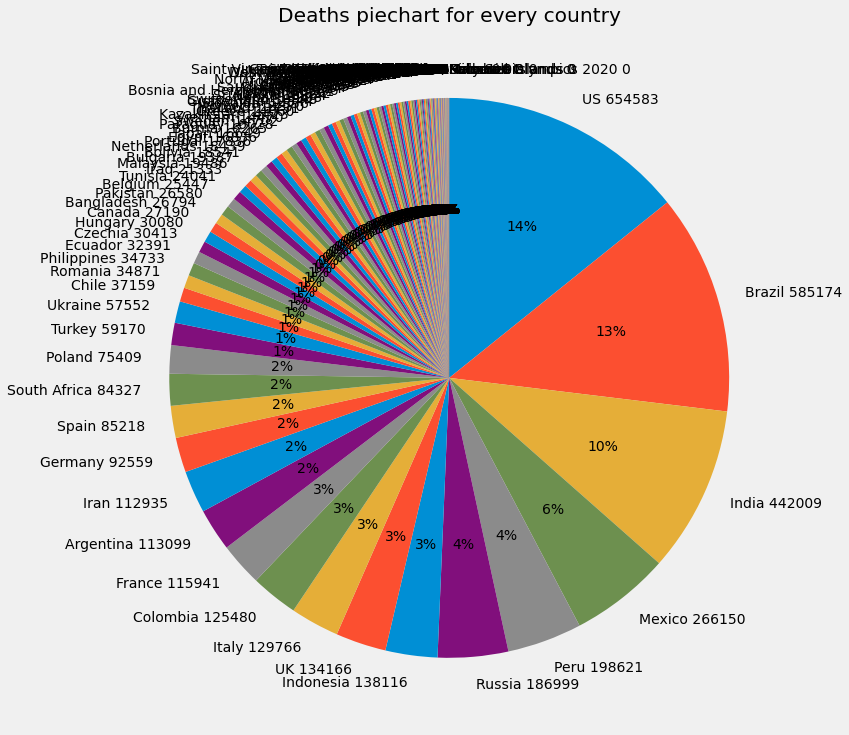

In [35]:
piechart('Deaths')

World total:  9142


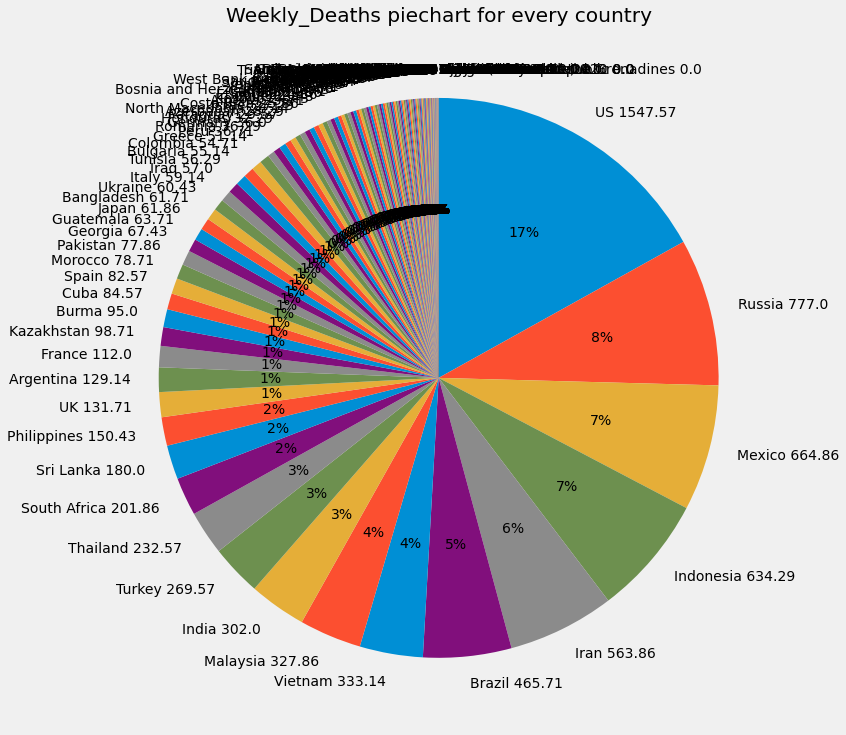

In [36]:
piechart('Weekly_Deaths')

World total:  9327


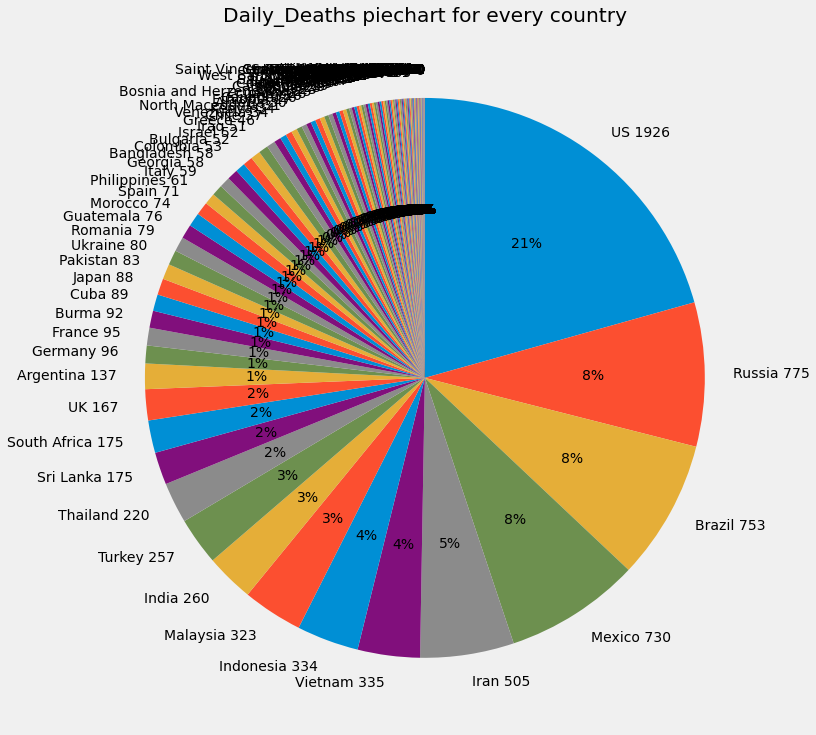

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-10


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

921144200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master ab5c921] `date` update
 1 file changed, 2132 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   6d9abbe..ab5c921  master -> master
